In [1]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim
import pandas as pd


torch ile mnist veri setini indirme

In [3]:
# 1 Veriyi yükleyelim
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

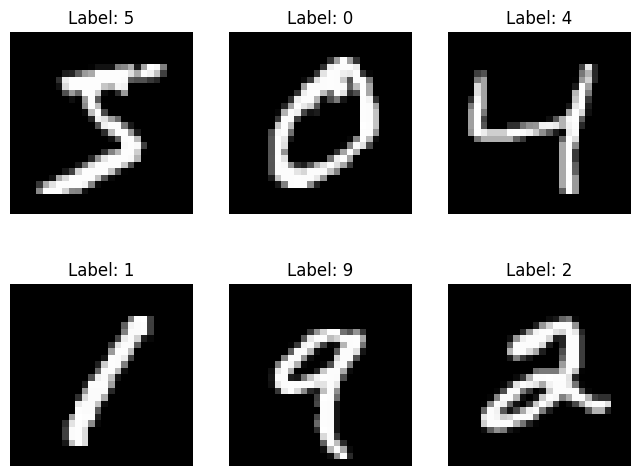

In [4]:
import matplotlib.pyplot as plt

# İlk 6 örneği görselleştirme
fig, axes = plt.subplots(2, 3, figsize=(8, 6))

for i in range(6):
    image, label = train_dataset[i]  # Veriyi al
    ax = axes[i // 3, i % 3]  # 2x3'lük matris içine yerleştir
    ax.imshow(image.squeeze(), cmap="gray")  # Görüntüyü çiz (1x28x28 olduğu için squeeze())
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.show()

In [5]:
# 2 Lojistik Regresyon Modeli (Softmax ile)
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(28*28, 10)  # 28x28 görüntüyü 10 sınıfa sınıflandır

    def forward(self, x):
        x = x.view(-1, 28*28)  # Görüntüyü vektöre çevir (784 özellik)
        return self.linear(x)  # Softmax eklemiyoruz çünkü CrossEntropyLoss bunu yapıyor
# Modeli başlatalım
model = LogisticRegressionModel()

In [17]:
# 3 Kayıp Fonksiyonu ve Optimizasyon
criterion = nn.CrossEntropyLoss()  # Softmax içerir
optimizer = optim.SGD(model.parameters(), lr=0.05)  # Stokastik Gradient Descent

In [19]:
# 4 Modeli Eğitelim
num_epochs = 10  # 10 epoch yeterli olacaktır

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/10], Loss: 0.3020
Epoch [2/10], Loss: 0.2210
Epoch [3/10], Loss: 0.2038
Epoch [4/10], Loss: 0.1685
Epoch [5/10], Loss: 0.1409
Epoch [6/10], Loss: 0.3562
Epoch [7/10], Loss: 0.2938
Epoch [8/10], Loss: 0.1893
Epoch [9/10], Loss: 0.4749
Epoch [10/10], Loss: 0.1588


In [21]:
# 5 Test Verisi ile Modeli Değerlendirelim
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Doğruluğu: {accuracy:.2f}%")

Test Doğruluğu: 91.71%
